## cricket score predection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.simplefilter("ignore")

## Exploring the data


In [3]:
df=pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## Data cleaning

In [6]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76014 entries, 0 to 76013
Series name: date
Non-Null Count  Dtype         
--------------  -----         
76014 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 594.0 KB


## Feature selection

In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
venues=df['venue'].nunique()

In [14]:
df['bat_team'].nunique()

14

In [15]:
df['bowl_team'].nunique()

14

In [16]:
df['total'].describe()

count    76014.000000
mean       160.901452
std         29.246231
min         67.000000
25%        142.000000
50%        162.000000
75%        181.000000
max        263.000000
Name: total, dtype: float64

In [17]:
venues=df['venue'].unique()

In [18]:
for i in venues:
    print(i,'-',round(df[df['venue']==i]['total'].mean()))

M Chinnaswamy Stadium - 170
Punjab Cricket Association Stadium, Mohali - 164
Feroz Shah Kotla - 165
Wankhede Stadium - 165
Eden Gardens - 157
Sawai Mansingh Stadium - 156
Rajiv Gandhi International Stadium, Uppal - 158
MA Chidambaram Stadium, Chepauk - 166
Dr DY Patil Sports Academy - 148
Newlands - 145
St George's Park - 159
Kingsmead - 152
SuperSport Park - 152
Buffalo Park - 147
New Wanderers Stadium - 144
De Beers Diamond Oval - 158
OUTsurance Oval - 135
Brabourne Stadium - 180
Sardar Patel Stadium, Motera - 163
Barabati Stadium - 168
Vidarbha Cricket Association Stadium, Jamtha - 149
Himachal Pradesh Cricket Association Stadium - 176
Nehru Stadium - 151
Holkar Cricket Stadium - 158
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium - 160
Subrata Roy Sahara Stadium - 148
Shaheed Veer Narayan Singh International Stadium - 146
JSCA International Stadium Complex - 149
Sheikh Zayed Stadium - 151
Sharjah Cricket Stadium - 158
Dubai International Cricket Stadium - 149
Maharashtra Cricke

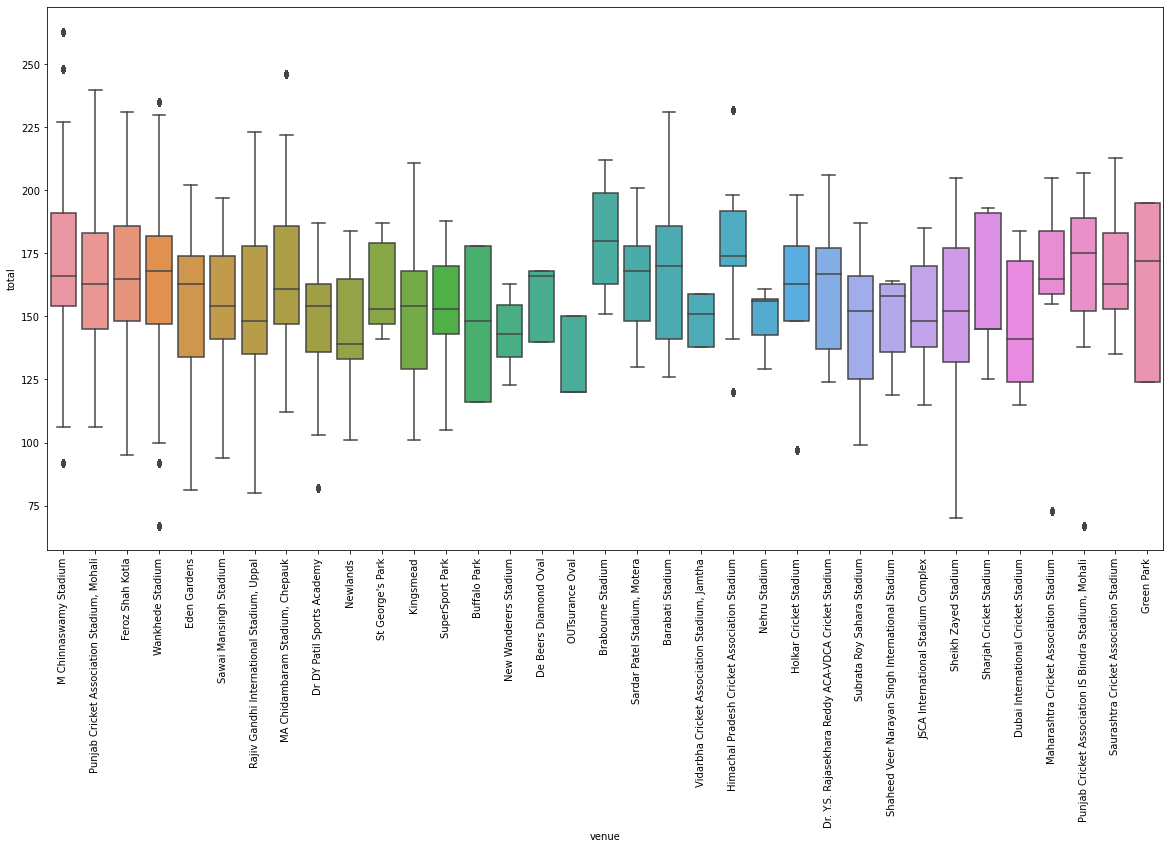

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='venue',y='total')
plt.xticks(rotation=90)
plt.show()

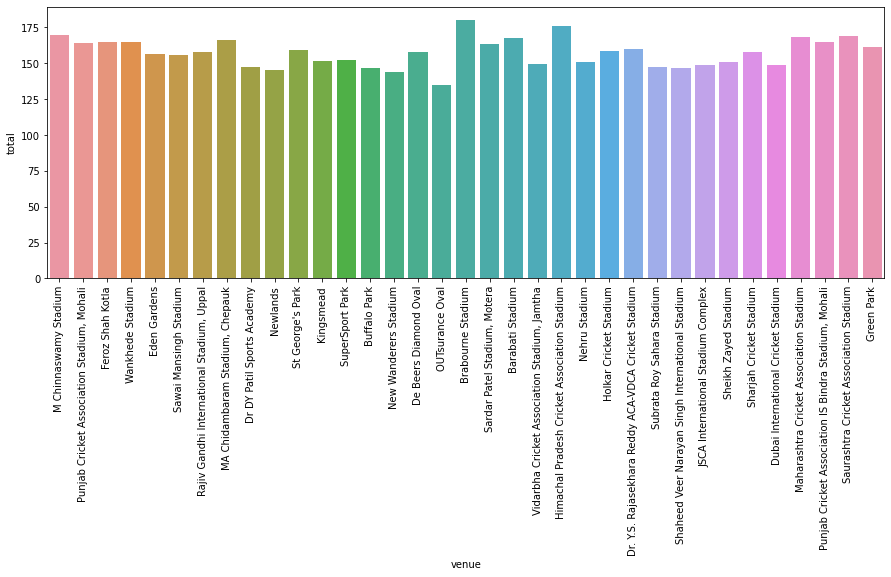

In [20]:
plt.figure(figsize=(15,5))
sns.barplot('venue','total',data=df,ci=False)
plt.xticks(rotation=90)
plt.show()

In [21]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [22]:
df=df.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [23]:
batting_side=df['bat_team'].unique()

In [24]:
df['bat_team'].nunique()

13

In [25]:
for i in batting_side:
    print(i,'-',round(df[df['bat_team']==i]['total'].mean()))

Kolkata Knight Riders - 157
Chennai Super Kings - 166
Rajasthan Royals - 158
Mumbai Indians - 163
Deccan Chargers - 158
Kings XI Punjab - 161
Royal Challengers Bangalore - 167
Delhi Daredevils - 156
Kochi Tuskers Kerala - 144
Pune Warriors - 149
Sunrisers Hyderabad - 163
Rising Pune Supergiants - 166
Gujarat Lions - 162


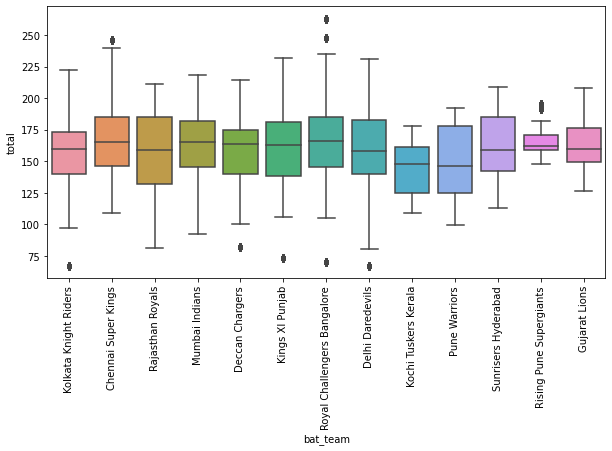

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='bat_team',y='total')
plt.xticks(rotation=90)
plt.show()

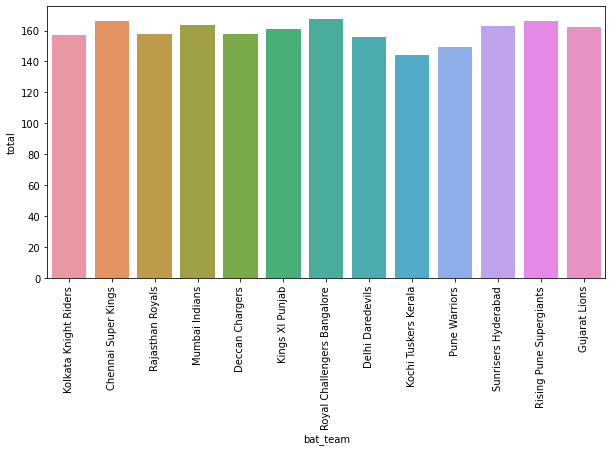

In [27]:
plt.figure(figsize=(10,5))
sns.barplot('bat_team','total',data=df,ci=False)
plt.xticks(rotation=90)
plt.show()

In [28]:
bowling_side=df['bowl_team'].unique()

In [29]:
for i in bowling_side:
    print(i,'-',round(df[df['bowl_team']==i]['total'].mean()))

Royal Challengers Bangalore - 163
Kings XI Punjab - 167
Delhi Daredevils - 163
Kolkata Knight Riders - 156
Rajasthan Royals - 158
Mumbai Indians - 159
Chennai Super Kings - 161
Deccan Chargers - 163
Pune Warriors - 157
Kochi Tuskers Kerala - 144
Sunrisers Hyderabad - 157
Rising Pune Supergiants - 157
Gujarat Lions - 174


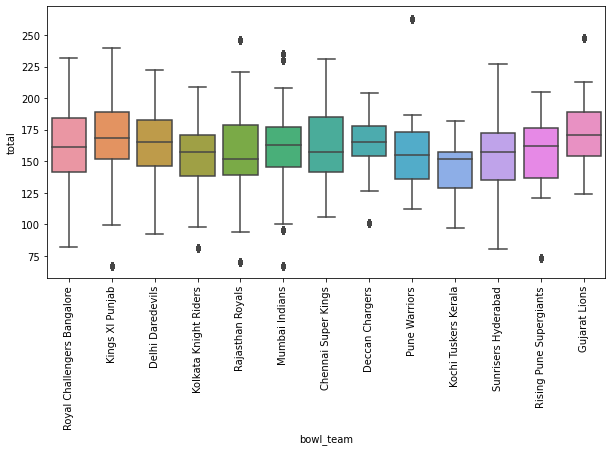

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='bowl_team',y='total')
plt.xticks(rotation=90)
plt.show()

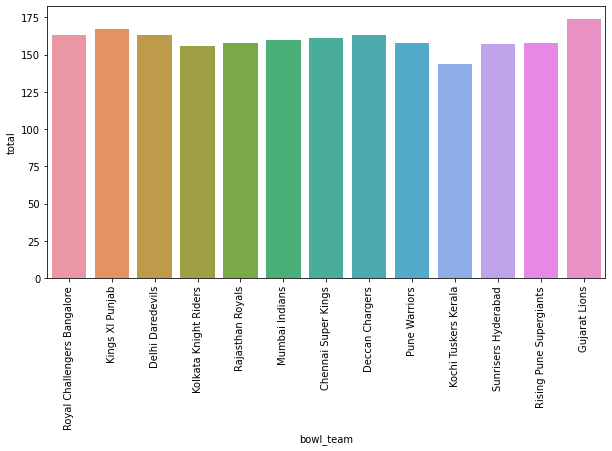

In [31]:
plt.figure(figsize=(10,5))
sns.barplot('bowl_team','total',data=df,ci=False)
plt.xticks(rotation=90)
plt.show()

In [32]:
year=[]
for i in df['date']:
    year.append(i.year)

df['year']=year

In [33]:
years=df['year'].unique()

NameError: name 'figure' is not defined

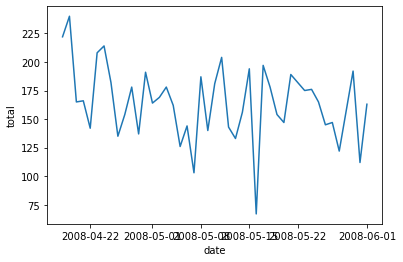

In [34]:
for i in years:
    df_x=df[df['year']==i]
    sns.lineplot(data=df_x.drop_duplicates('date'),x='date',y='total')
    plt.show()

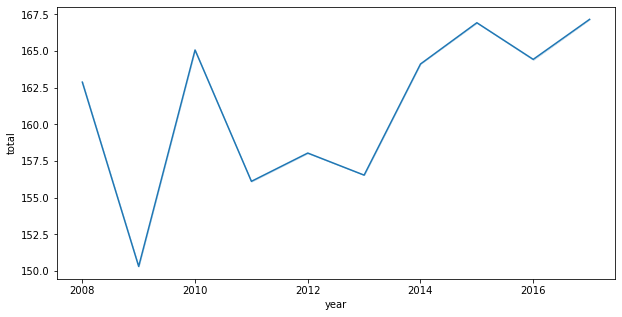

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot('year','total',data=df,ci=False)
plt.show()

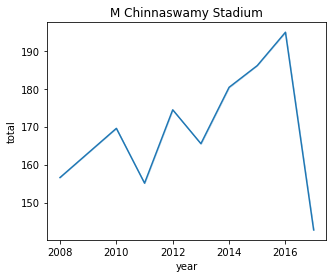

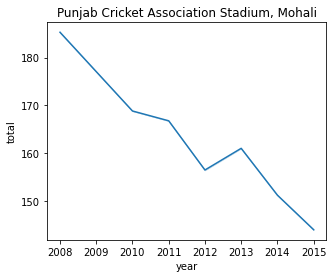

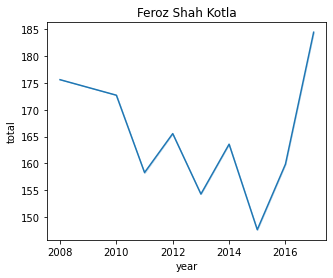

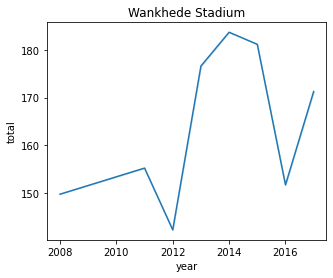

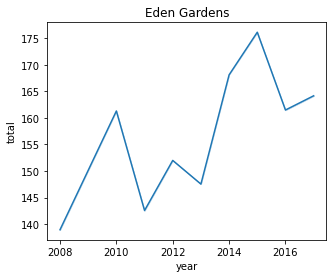

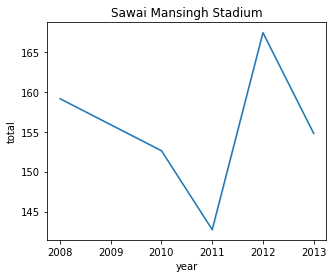

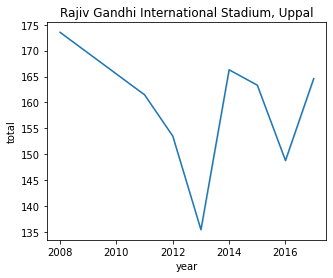

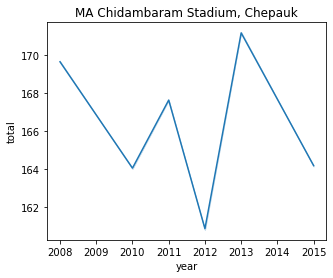

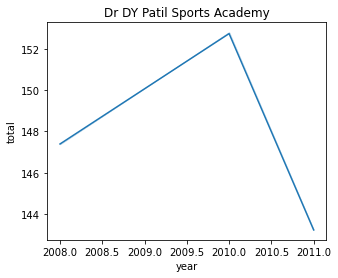

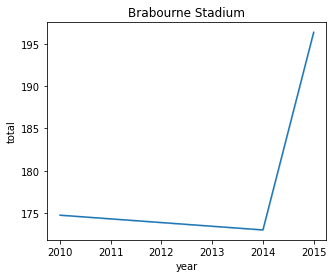

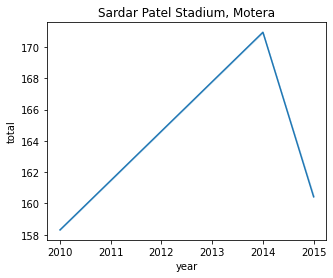

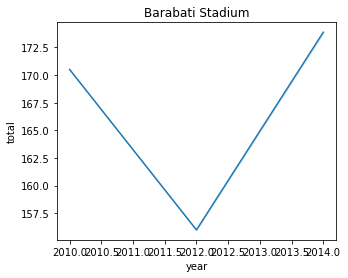

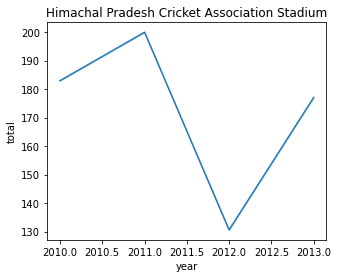

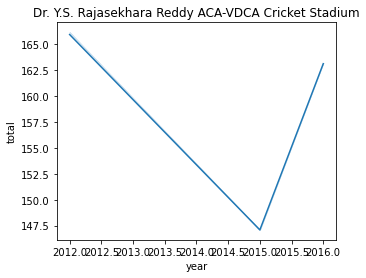

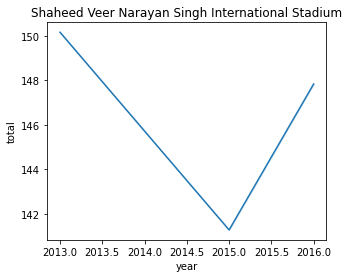

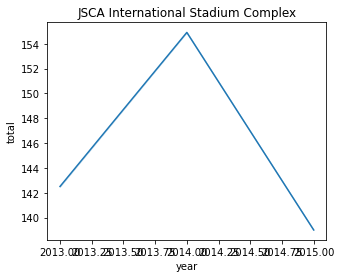

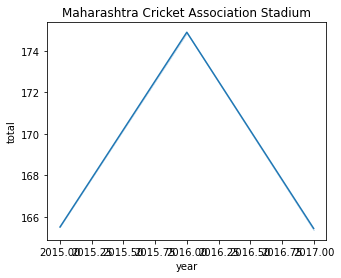

In [36]:
for i in venues:
    df_x=df[df['venue']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

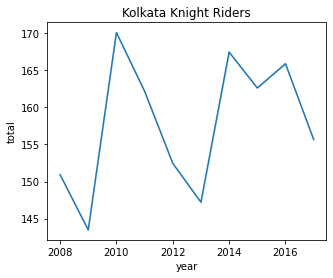

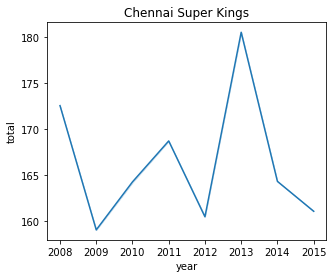

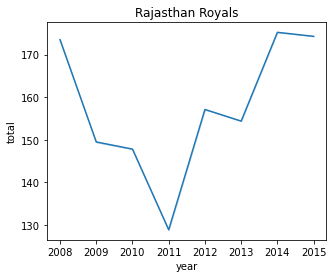

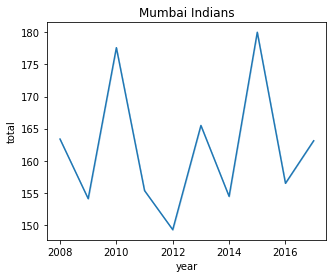

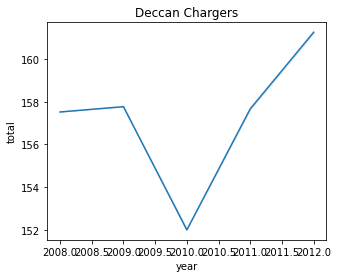

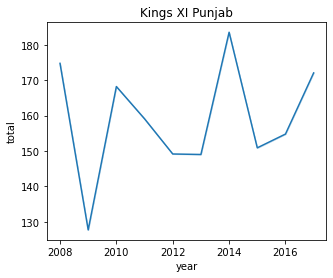

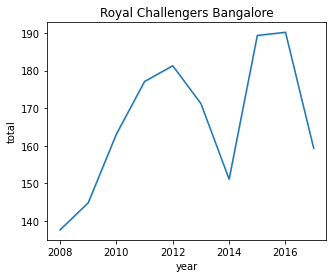

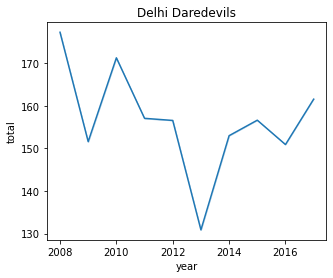

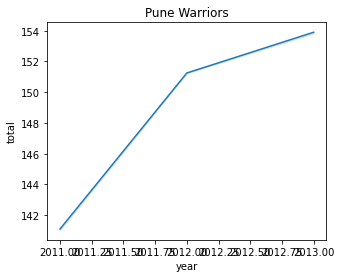

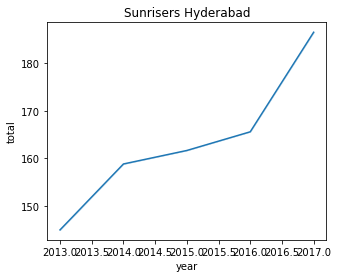

In [37]:
for i in batting_side:
    df_x=df[df['bat_team']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

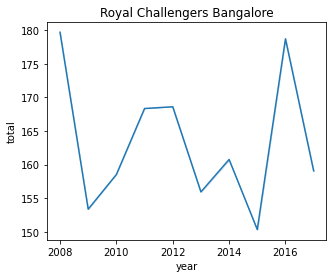

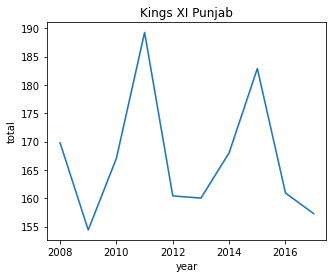

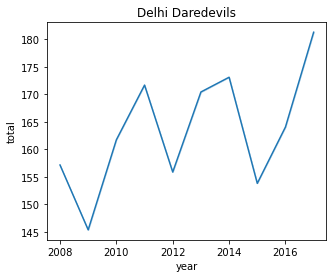

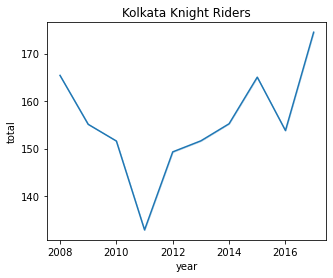

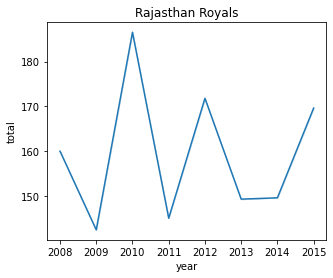

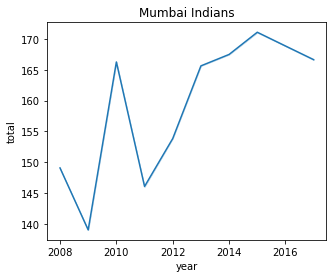

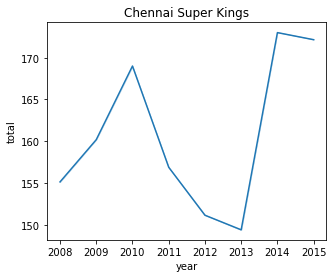

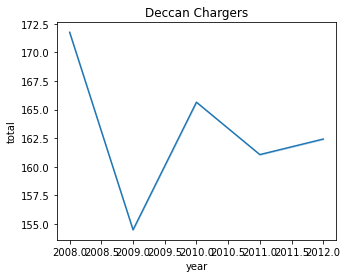

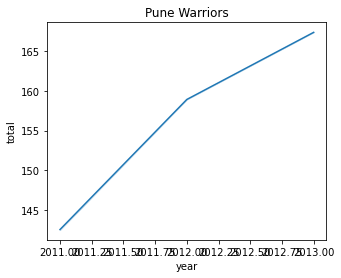

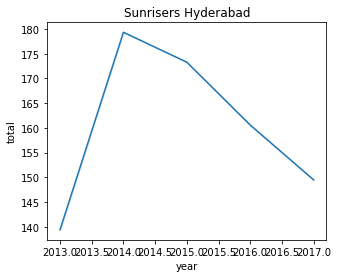

In [38]:
for i in bowling_side:
    df_x=df[df['bowl_team']==i]
    if(df_x['year'].nunique() >= 3):
        plt.figure(figsize=(5,4))
        sns.lineplot('year','total',data=df_x,ci=False).set(title=i)
        plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categ=['venue','bat_team','bowl_team']
df[categ] = df[categ].apply(le.fit_transform)

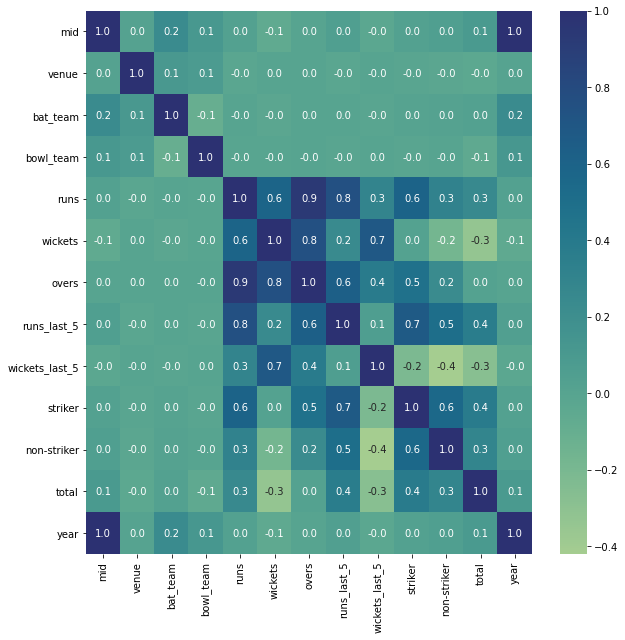

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(['date','batsman','bowler'],axis=1).corr(),annot=True,cmap="crest",fmt=".1f")
plt.show()

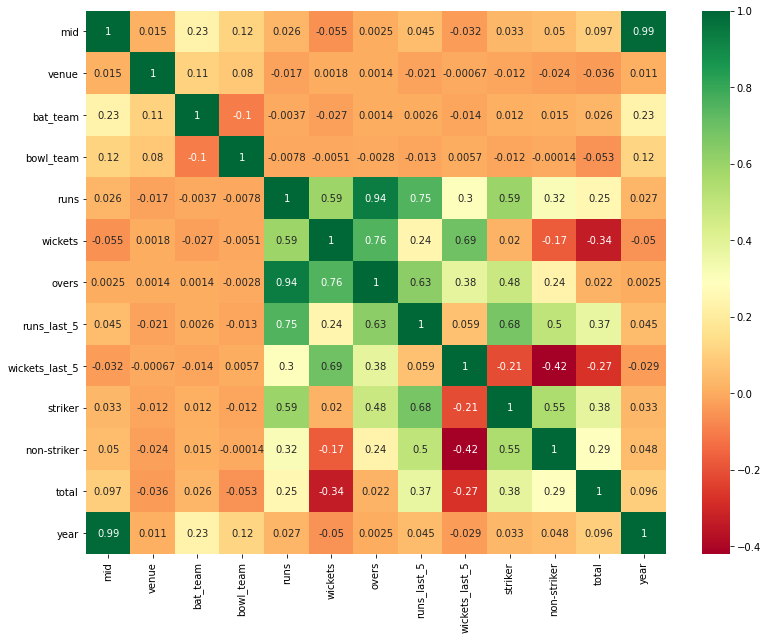

In [41]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [42]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['mid', 'date', 'venue', 'batsman', 'bowler', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total',
       'year', 'bat_team_0', 'bat_team_1', 'bat_team_2', 'bat_team_3',
       'bat_team_4', 'bat_team_5', 'bat_team_6', 'bat_team_7', 'bat_team_8',
       'bat_team_9', 'bat_team_10', 'bat_team_11', 'bat_team_12',
       'bowl_team_0', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3',
       'bowl_team_4', 'bowl_team_5', 'bowl_team_6', 'bowl_team_7',
       'bowl_team_8', 'bowl_team_9', 'bowl_team_10', 'bowl_team_11',
       'bowl_team_12'],
      dtype='object')

In [43]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year
0,1,2008-04-18,14,6,11,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,2008
1,1,2008-04-18,14,6,11,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,2008
2,1,2008-04-18,14,6,11,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,2008
3,1,2008-04-18,14,6,11,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,2008
4,1,2008-04-18,14,6,11,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,2008


In [45]:
# Splitting the data into train and test set
X_train = df.drop(labels='total', axis=1)[df['date'].dt.year <= 2016]
X_test = df.drop(labels='total', axis=1)[df['date'].dt.year >= 2017]

y_train = df[df['date'].dt.year <= 2016]['total'].values
y_test = df[df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (68862, 14) and Test set: (7152, 14)


## Model Building